OpenCV tiene funciones cv2.dft() y cv2.idft(),y nos proporciona dos canales:

El primer canal representa la parte real del resultado.
El segundo canal para la parte imaginaria del resultado.

Entonces, la forma del np.ndarray devuelto por las funciones será (rows, cols, 2).

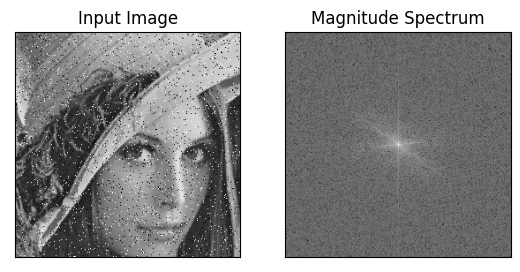

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


#img = cv2.imread('noisy.png',0)
img = cv2.imread('noisy_lena.png',0)
#print("hola", img.shape)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

En esta sección, crearemos un Filtro de paso bajo (low pass filter) LPF para eliminar contenidos de alta frecuencia en la imagen. En otras palabras, vamos a aplicar LPF a la imagen que tiene un efecto suavizado (se aprecia como desenfoque).

Hemos seleccionado un rango r de +-50 unidades para el paso del filtro

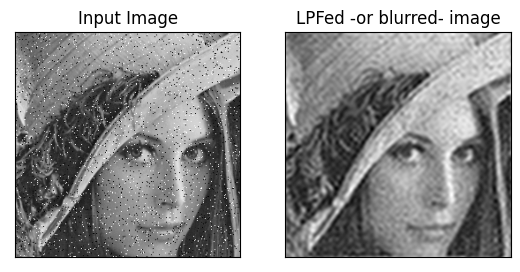

In [32]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 35
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

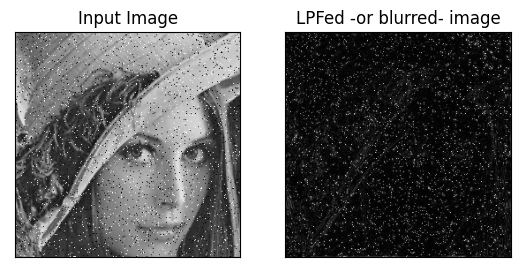

In [34]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 35
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

In [35]:
r = 35
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_One = cv2.idft(f_ishift)
img_One = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

r = 35
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_Two = cv2.idft(f_ishift)
img_Two = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.imshow(np.sum(img_One, img_Two), cmap = 'gray')


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

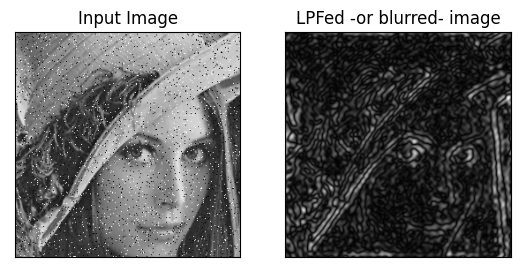

In [29]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
one, two = 35, 10
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-one:crow+one, ccol-one:ccol+one] = 1
mask[crow-two:crow+two, ccol-two:ccol+two] = 0

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

##### By modifying "r", we notice that the closer to zero, the more blurry the image is. This is because it starts deleting noise. In the other hand, the greater the value of "r" is, the clearer the image is (but it contains more noise).